# ds minor project - pragati gupta jan 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("mobile_price_range_data.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

### therefore no null values in our table

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.shape

(2000, 21)

In [6]:
df["price_range"].unique()

array([1, 2, 3, 0], dtype=int64)

### therefore our dependent variable has 4 unique values

In [7]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


# visualizations

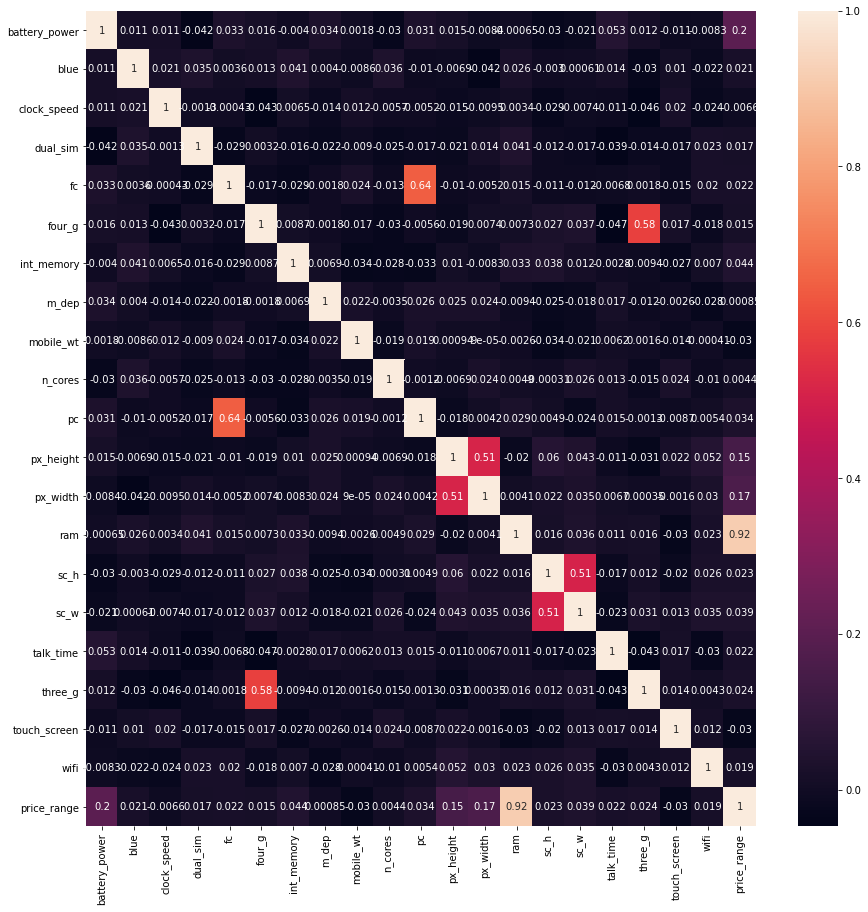

In [8]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='price_range', ylabel='count'>

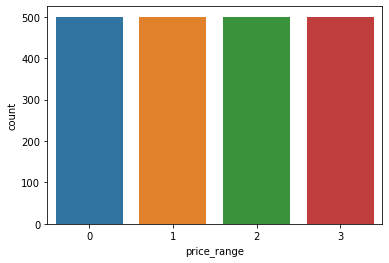

In [9]:
sns.countplot(x=df['price_range'], data=df)

### therefore our data has 500 values each of category - 0,1,2,3

<AxesSubplot:xlabel='blue', ylabel='count'>

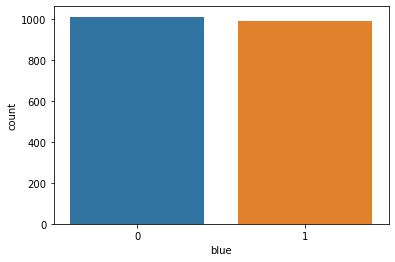

In [10]:
sns.countplot(x=df['blue'], data=df)

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

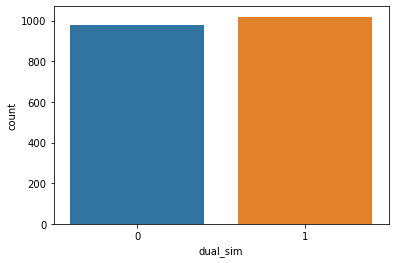

In [11]:
sns.countplot(x=df['dual_sim'], data=df)

<AxesSubplot:xlabel='four_g', ylabel='count'>

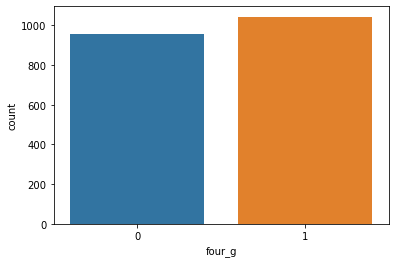

In [12]:
sns.countplot(x=df['four_g'], data=df)

<AxesSubplot:xlabel='n_cores', ylabel='count'>

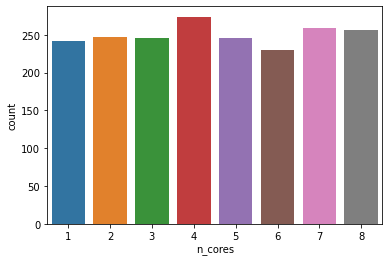

In [13]:
sns.countplot(x=df['n_cores'], data=df)

<AxesSubplot:xlabel='talk_time', ylabel='count'>

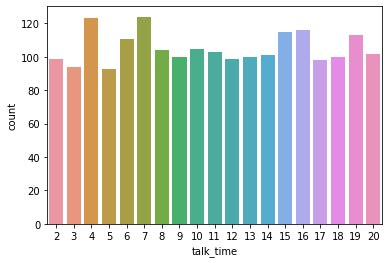

In [14]:
sns.countplot(x=df['talk_time'], data=df)

<AxesSubplot:xlabel='three_g', ylabel='count'>

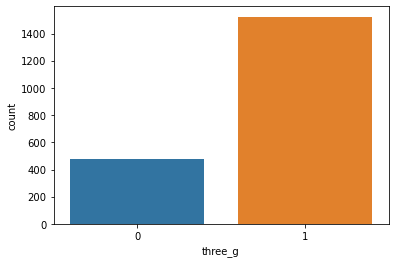

In [15]:
sns.countplot(x=df['three_g'], data=df)

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

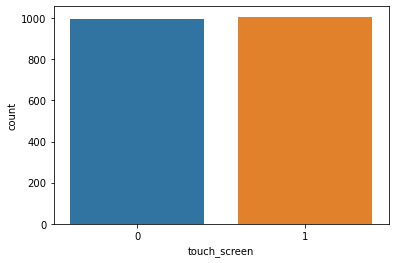

In [16]:
sns.countplot(x=df['touch_screen'], data=df)

<AxesSubplot:xlabel='wifi', ylabel='count'>

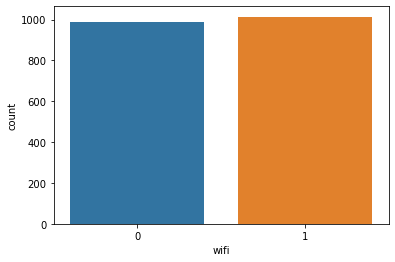

In [17]:
sns.countplot(x=df['wifi'], data=df)

In [41]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train,y_test = tts(x,y,test_size =0.05)

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# 1

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter =2000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.95      1.00      0.97        18
           2       1.00      0.91      0.95        23
           3       0.96      1.00      0.98        26

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [68]:
y_pred              # price range for test data by logistic regression

array([0, 3, 1, 3, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 3, 3,
       2, 1, 2, 3, 2, 2, 2, 1, 1, 0, 1, 2, 3, 2, 0, 3, 3, 1, 0, 3, 0, 0,
       3, 1, 2, 2, 0, 0, 3, 0, 3, 1, 0, 2, 2, 3, 0, 2, 0, 0, 3, 3, 0, 1,
       2, 1, 0, 3, 3, 0, 0, 0, 3, 3, 0, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0,
       3, 0, 1, 2, 3, 2, 3, 3, 1, 0, 0, 2], dtype=int64)

In [43]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0],
       [ 0, 18,  0,  0],
       [ 0,  1, 21,  1],
       [ 0,  0,  0, 26]], dtype=int64)

# 2

In [72]:
from sklearn.neighbors import KNeighborsClassifier
import math

k = math.sqrt(len(y_test))
if k%2 ==0 :
    k=k+1
k = int(k)
k

11

In [71]:
classifier = KNeighborsClassifier(n_neighbors=k,p=2,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred2 =  classifier.predict(x_test)
y_pred2                       # price range for test data by knn

array([0, 2, 1, 3, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 3, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 3, 2, 2, 3, 1, 0, 0, 1, 1, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1,
       3, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 1,
       1, 1, 0, 3, 2, 0, 0, 0, 1, 3, 0, 0, 2, 2, 0, 3, 1, 1, 3, 2, 2, 0,
       3, 0, 2, 2, 1, 1, 3, 1, 0, 0, 0, 0], dtype=int64)

In [57]:
cm= confusion_matrix(y_test,y_pred2)
cm

array([[27,  6,  0,  0],
       [ 5, 10,  3,  0],
       [ 2,  5, 13,  3],
       [ 0,  3,  8, 15]], dtype=int64)

In [58]:
print(metrics.accuracy_score(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

0.65
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.42      0.56      0.48        18
           2       0.54      0.57      0.55        23
           3       0.83      0.58      0.68        26

    accuracy                           0.65       100
   macro avg       0.65      0.63      0.63       100
weighted avg       0.68      0.65      0.66       100



# 3

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred3 = gnb.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred3))
print(metrics.classification_report(y_test,y_pred3))

0.87
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.76      0.72      0.74        18
           2       0.76      0.83      0.79        23
           3       0.96      0.88      0.92        26

    accuracy                           0.87       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100



In [73]:
y_pred3                 # price range for test data by naivebayes

array([0, 3, 1, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 3, 3,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 3, 1, 0, 2, 3, 2, 0, 2, 0, 1,
       3, 1, 2, 2, 0, 0, 3, 0, 3, 1, 0, 2, 2, 3, 0, 2, 0, 0, 3, 3, 0, 1,
       2, 2, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 2, 1, 0, 3, 2, 0, 3, 2, 3, 0,
       3, 0, 1, 3, 3, 2, 3, 2, 1, 0, 0, 1], dtype=int64)

In [49]:
cm= confusion_matrix(y_test,y_pred3)
cm

array([[32,  1,  0,  0],
       [ 2, 13,  3,  0],
       [ 0,  3, 19,  1],
       [ 0,  0,  3, 23]], dtype=int64)

# 4

In [50]:
from sklearn import svm
new = svm.SVC(kernel ='linear', C = 1).fit(x_train, y_train)
y_pred4 = new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))

0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.82      1.00      0.90        18
           2       0.95      0.78      0.86        23
           3       0.96      0.96      0.96        26

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.95      0.94      0.94       100



In [74]:
y_pred4                      # price range for test data by linear svm

array([0, 3, 1, 3, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 3, 3,
       2, 1, 2, 3, 2, 2, 2, 1, 1, 0, 1, 2, 3, 2, 0, 3, 3, 1, 0, 3, 0, 0,
       3, 1, 1, 2, 0, 0, 3, 0, 3, 1, 0, 2, 2, 3, 0, 2, 0, 0, 3, 3, 0, 1,
       2, 1, 0, 3, 3, 0, 0, 0, 3, 3, 0, 1, 2, 1, 0, 3, 1, 0, 3, 1, 2, 0,
       3, 0, 1, 2, 3, 2, 3, 3, 1, 0, 0, 1], dtype=int64)

In [51]:
cm= confusion_matrix(y_test,y_pred4)
cm

array([[33,  0,  0,  0],
       [ 0, 18,  0,  0],
       [ 0,  4, 18,  1],
       [ 0,  0,  1, 25]], dtype=int64)

# 5

In [52]:
model = svm.SVC(kernel='rbf', probability=True, C=1, gamma='scale').fit(x_train,y_train)
y_pred5 = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred5))
print(metrics.classification_report(y_test,y_pred5))

0.94
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.85      0.94      0.89        18
           2       0.91      0.87      0.89        23
           3       0.96      0.96      0.96        26

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [75]:
y_pred5                    # price range for test data by rbf svm

array([0, 3, 1, 3, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 3, 3,
       2, 1, 2, 3, 2, 2, 2, 1, 1, 0, 1, 2, 3, 2, 0, 3, 3, 1, 0, 3, 0, 0,
       3, 1, 1, 2, 0, 0, 3, 0, 3, 1, 1, 2, 2, 3, 0, 2, 0, 0, 3, 3, 0, 1,
       2, 1, 0, 3, 3, 0, 0, 0, 3, 3, 0, 1, 2, 1, 0, 3, 2, 0, 3, 2, 2, 0,
       3, 0, 1, 2, 3, 2, 3, 3, 1, 0, 0, 1], dtype=int64)

In [53]:
cm= confusion_matrix(y_test,y_pred5)
cm

array([[32,  1,  0,  0],
       [ 0, 17,  1,  0],
       [ 0,  2, 20,  1],
       [ 0,  0,  1, 25]], dtype=int64)

# variation across various prediction models

In [66]:
df_new = pd.DataFrame(data=y_test,columns=['y_test'])
df_new['y_pred_lr']= y_pred
df_new['y_pred_knn']=y_pred2
df_new['y_pred_nb']=y_pred3
df_new['y_pred_lin_svm']=y_pred4
df_new['y_pred_rbf_svm']=y_pred5
df_new= df_new.drop(columns=['y_test'])
df_new

,y_pred_lr,y_pred_knn,y_pred_nb,y_pred_lin_svm,y_pred_rbf_svm
0,0,0,0,0,0
1,3,2,3,3,3
2,1,1,1,1,1
3,3,3,3,3,3
4,2,0,2,2,2
...,...,...,...,...,...
95,3,1,2,3,3
96,1,0,1,1,1
97,0,0,0,0,0
98,0,0,0,0,0


<AxesSubplot:>

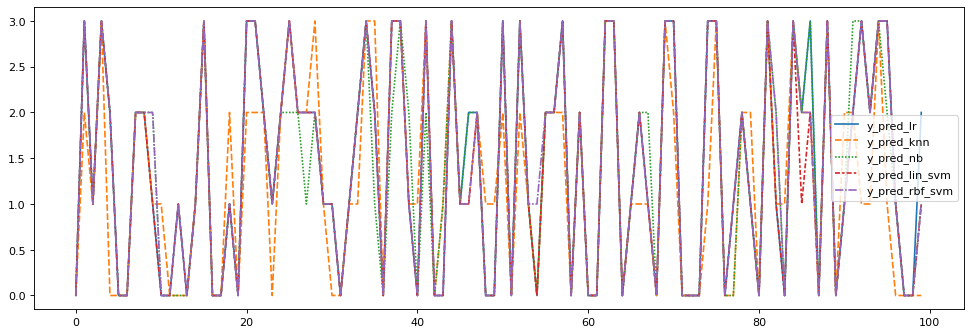

In [67]:
figure(figsize=(15,5), dpi=80)
sns.lineplot(data=df_new)

# logistic regression gave the best results with an accuracy of 98% followed by SVM ( both linear and rbf ) with an accuracy of 94%

# knn gave the worst results - only 65% accuracy